# Evaluating Equitable TOD Indicators in Prince George’s County: Greenbelt and College Park Case Study

**Author:** Michael Bochynski  
**Program:** Master of Community Planning  
**Institution:** University of Maryland, College Park  
**School:** School of Architecture, Planning & Preservation  
**Course:** URSP688Y: Urban Data Science and Smart Cities  
**Instructor:** Professor Chester Harvey  
**Date:** 12 May 2025  
 
## Problem Statement and Research Question

Prince George’s County, Maryland, has a robust transit infrastructure, including multiple WMATA Metrorail and MARC commuter rail stations. Despite the County's goals in [Plan Prince George’s 2035](https://planpgc2035.princegeorgesplanning.com/) to promote equitable, compact, and transit-oriented development (TOD), much of the land near transit stations remains locked in residential, detached, single-family zoning. 

This analysis explores land use efficiency and zoning constraints within a half-mile walking radius of the College Park and Greenbelt transit stations. The focus is on identifying parcels—especially in Calvert Hills, Old Town, and North College Park—that are underutilized based on built density and maximum density zoning allowances. The aim of this project is to generate policy recommendations that promote sustainable and equitable transit-oriented development.

To ground this research in a local context, a preliminary spatial analysis was conducted to assess the TOD alignment of land use around transit stations in College Park and Greenbelt, utilizing spatial data and parcel information from the Prince George’s County GIS Open Data Portal.

### Research Question: 
**To what extent are Prince George’s County and the City of College Park leveraging their transit assets to align with equitable TOD best practices?**

## Data and Methods

National best practices for transit-oriented development (TOD) emphasize compact, walkable, and high-density residential development within close proximity to transit stations. While there is no single prescribed density standard, the [Federal Transit Administration Research](https://www.transit.dot.gov/sites/fta.dot.gov/files/FTA_Report_No._0057.pdf) reports that urban TOD projects average approximately 36 dwelling units per acre, with a median of 36, and that suburban TODs average 17.4 units per acre. These figures provide a reference point for evaluating the effectiveness of land use near transit. 

To evaluate TOD alignment and equity, a spatial analysis framework was employed, using a 0.5-mile buffer around each station. This corresponds to a typical ten-minute walk radius. Data was sourced from Prince George’s County GIS portals, supplemented by local zoning ordinance descriptions.

Key indicators analyzed include:
- **Built Density**: Residential dwelling units per acre.
- **Allowed Density**: Maximum permitted density under current zoning.
- **Underutilization Ratio**: The ratio of allowed to built density, indicating untapped development capacity.
- **Land Use and Zoning Composition**: Breakdown of residential, commercial, and institutional uses.
- **Ownership and Occupancy Rates**: Analysis of owner vs. renter-occupied properties.

Code for data processing and visualization is implemented in separate modules, which are imported and utilized below:

### 1. Load Packages

In [3]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import warnings
warnings.filterwarnings("ignore")

### 2. Load Modules

In [4]:
from modules.data_loader import load_geodata
from modules.preprocessing import reproject_all, create_buffer, filter_parcels
from modules.density import assign_allowed_density, calculate_densities
from modules.summarizer import summarize
from modules.zoning_map import plot_zoning_map

### 3. Data Loading and Reprojection:
The analysis begins by loading the relevant geospatial datasets, including the metro buffers, metro stations, municipal boundary, and property parcels. These datasets are then reprojected to a consistent coordinate reference system (CRS) to ensure compatibility in spatial operations. The function load_geodata() loads the datasets, while reproject_all() ensures all data layers align spatially by reprojecting them to a common CRS.

In [5]:
# Load and reproject data
metro_buffer, metro_stations, muni_boundary, property_gdf = load_geodata()
metro_buffer, metro_stations, muni_boundary, property_gdf = reproject_all(
    [metro_buffer, metro_stations, muni_boundary, property_gdf]
)

### 4. Buffer Creation and Selection:
Buffers of 0.5-miles are created around College Park-U of MD and Greenbelt metro stations to delineate the areas of interest for the analysis. The 0.5-mile distance is the standard catchment area in the U.S. for planning TOD. These buffers allow for the identification of parcels within a set distance of transit stations, which are critical in TOD assessments. The buffers are created using the create_buffer() function.

In [6]:
# Setup buffers
metro_union = metro_buffer.unary_union
pg_metro_buffer = property_gdf[property_gdf.geometry.within(metro_union)].copy()

greenbelt_geom = create_buffer(metro_stations, 'Greenbelt')
cpumd_geom = create_buffer(metro_stations, 'College Park-U of Md')
cp_geom = muni_boundary[muni_boundary['CITY'] == 'College Park'].geometry.unary_union

### 5. Parcel Filtering:
For each of the defined areas (Greenbelt, College Park-U of Md), parcels are filtered from the broader property dataset. This ensures that only those parcels within the buffers or the city boundary are included in the analysis. The filter_parcels() function selects parcels that fall within the defined buffer zones, focusing on areas in close proximity to transit.

In [7]:
# Filter parcel groups
greenbelt_cp = filter_parcels(property_gdf, greenbelt_geom, cp_geom)
cpumd_cp = filter_parcels(property_gdf, cpumd_geom, cp_geom)
cp_city = property_gdf[property_gdf.geometry.within(cp_geom)]

### 6. Density Calculations:
Density is calculated for each of the filtered datasets and used for evaluating the level of development in the study areas. Higher densities near transit  are associated with better TOD alignment. The calculate_densities() function computes the density of each parcel, which helps determine the spatial distribution of development.

In [8]:
# Calculate density metrics
property_gdf = calculate_densities(property_gdf)
greenbelt_cp = calculate_densities(greenbelt_cp)
cpumd_cp = calculate_densities(cpumd_cp)
cp_city = calculate_densities(cp_city)
pg_metro_buffer = calculate_densities(pg_metro_buffer)

### 7. Summary of Results:
After calculating densities for each area of interest, a summary of the findings is generated to evaluate the level of TOD alignment in each region. This includes determining the allowed densities for different zoning classifications and summarizing the results for the analysis areas. The summarize() function provides a summary of each area, including the assigned densities based on the zoning regulations.

In [9]:
# Summarize
summarize(pg_metro_buffer, "Prince George's One Mile Metro Buffer", assign_allowed_density)
summarize(cp_city, "College Park City", assign_allowed_density)
summarize(greenbelt_cp, "Greenbelt Half-Mile Buffer", assign_allowed_density)
summarize(cpumd_cp, "College Park-U of Md Half-Mile Buffer", assign_allowed_density)


Prince George's One Mile Metro Buffer Summary
 - Total Units: 73179.00
 - Total Acres: 12283.48
 - Built Density: 5.96
 - Allowed Density: 52.05
 - Underutilized Parcels: 11128
 - Underutilization Ratio: 0.75
         Percent  Count
ZONE_1                 
RSF-65     61.78  23826
RSF-A      21.08   8129
RSF-95      4.04   1557
LTO-C       2.81   1084
RR          2.03    784
LTO-E       1.63    628
RTO-L-E     1.48    569
RTO-H-E     1.21    467
RMF-48      1.01    388
RMF-20      0.83    321
RMF-12      0.62    238
RTO-H-C     0.60    232
NAC         0.58    224
RTO-L-C     0.20     79
IE          0.03     12
AG          0.02      8
CGO         0.02      6
LMUTC       0.01      4
IH          0.01      3
ROS         0.01      3
CS          0.00      1
CN          0.00      1
 - Section 42 (LIHTC) Parcels: 24

College Park City Summary
 - Total Units: 8964.00
 - Total Acres: 1328.04
 - Built Density: 6.75
 - Allowed Density: 33.76
 - Underutilized Parcels: 988
 - Underutilization Ratio:

### 8. Zoning Visualization:
To visualize the zoning classifications, a color map is applied to different zones based on their land use designation. The plot_zoning_map() function is used to generate a map that overlays these zoning areas with the corresponding buffers, showing the areas where transit-oriented development could be better supported or aligned. The zoning map is generated to visualize the zoning designations and how they correspond with the buffer zones, allowing for an easier comparison of zoning patterns with TOD potential.

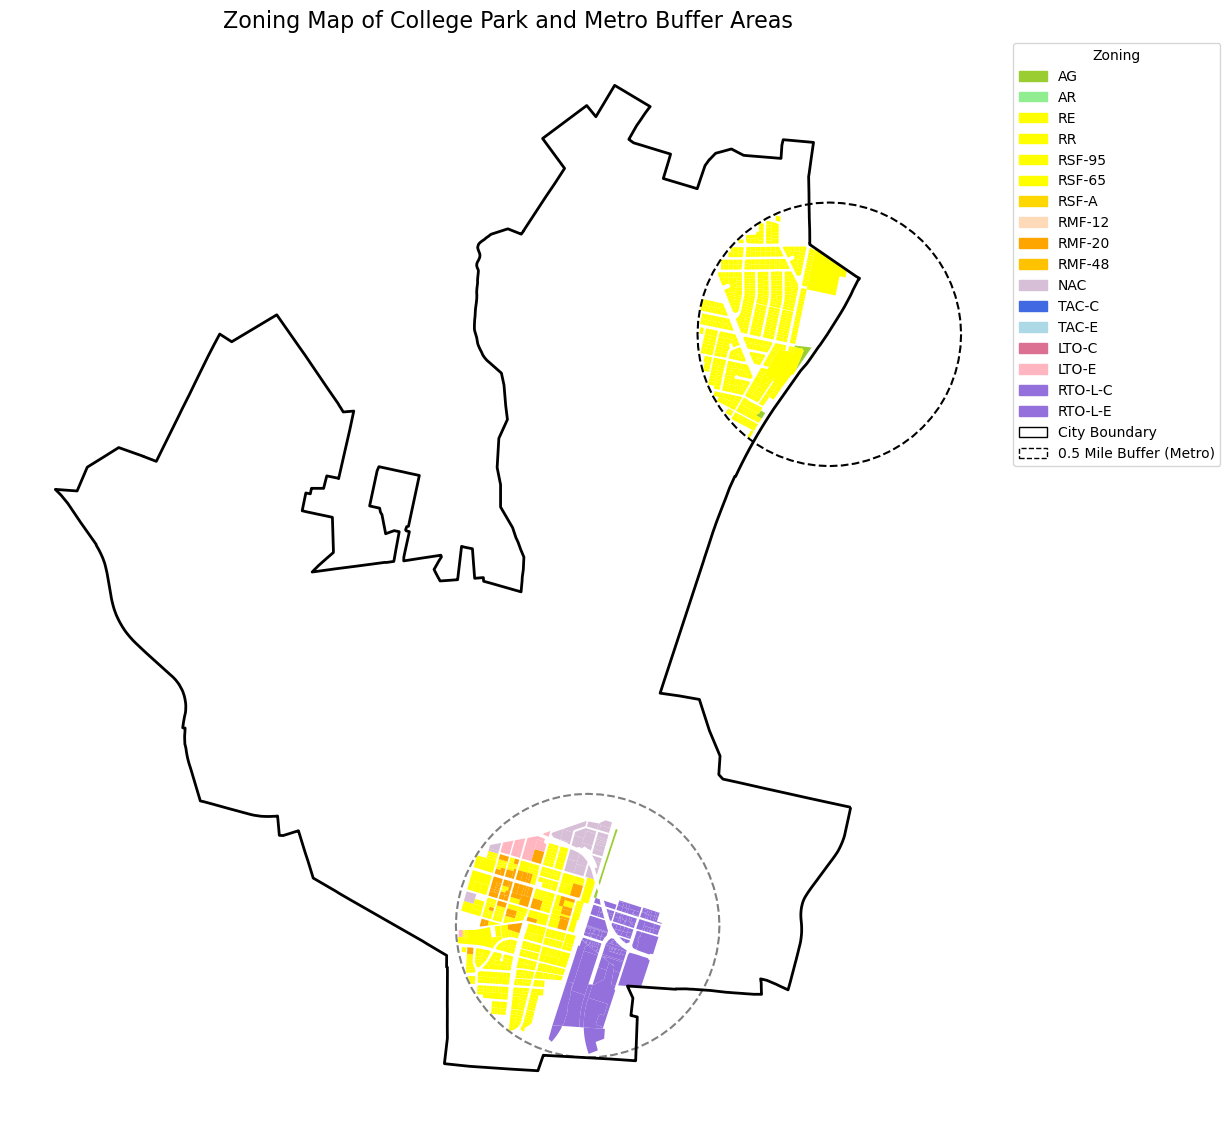

In [10]:
# -- Data Preparation --
zones_of_interest = pd.concat([greenbelt_cp, cpumd_cp])

zone_color_map = {
    'AG': 'yellowgreen', 'AR': 'lightgreen',
    'RE': 'yellow', 'RR': 'yellow', 'RSF-95': 'yellow', 'RSF-65': 'yellow',
    'RSF-A': '#FFD700', 'RMF-12': '#FFDAB9', 'RMF-20': '#FFA500',
    'RMF-48': '#FFC200', 'NAC': '#D8BFD8', 'TAC-C': '#4169E1',
    'TAC-E': '#ADD8E6', 'LTO-C': '#DB7093', 'LTO-E': '#FFB6C1',
    'RTO-L-C': '#9370DB', 'RTO-L-E': '#9370DB'
}

zones_of_interest['zone_color'] = zones_of_interest['ZONE_1'].map(zone_color_map)
zones_of_interest = zones_of_interest.dropna(subset=['zone_color'])

# -- Plot Zoning Map --
plot_zoning_map(zones_of_interest, greenbelt_geom, cpumd_geom, cp_geom, zone_color_map)

## Output Summary

**Greenbelt Station (within College Park limits)**
- Total Dwelling Units: 676 DU
- Total Acres: 118.71 acres
- Built Density: 5.69 DU/acre (below typical suburban TOD benchmark of 10–20 DU/acre)
- Allowed Density: 6.70 DU/acre
- Underutilization Ratio: 1.06 (Built density slightly exceeds allowed zoning; near full utilization)

_**Implication:**_ Development near Greenbelt Station is relatively mature with limited immediate infill capacity under current zoning.

**College Park–U of Md Station (within College Park limits)**
- Total Dwelling Units: 646 DU
- Total Acres: 205.74 acres
- Built Density: 3.14 DU/acre (significantly below TOD benchmarks)
- Allowed Density: 71.68 DU/acre
- Underutilization Ratio: 0.59 (Built density far below allowed zoning; substantial redevelopment potential)

_**Implication:**_ There is considerable opportunity to increase density near the university station, supporting TOD goals and housing growth.

## Preliminary Analysis

This analysis of residential development patterns and zoning capacity within Prince George’s County’s Metro station buffers reveals a complex landscape of current built densities, zoning allowances, and underutilization — with significant implications for transit-oriented development (TOD) and affordable housing strategies.

### Built Density vs. Zoning Capacity
Across the study areas, built residential densities range from approximately 3.1 to 6.8 dwelling units per acre, generally falling below widely recognized national TOD benchmarks, which recommend densities of at least 10 dwelling units per acre to support effective transit ridership and walkability. For instance, the College Park–University of Maryland half-mile buffer exhibits a built density of only 3.14 du/ac despite zoning that allows for densities as high as 71.68 du/ac, indicating substantial unrealized development potential.

Other areas, such as the Greenbelt half-mile buffer, have built densities closer to their zoning limits (5.69 du/ac built vs. 6.7 du/ac allowed)-well short of national TOD benchmarks. College Park fares better in some areas, particularly near the university district, but still includes large sections constrained by low-density zoning and preservation overlays.

### Underutilization and Development Opportunities
The underutilization ratio, measuring the extent to which parcels are developed relative to their zoning capacity, varies from 0.59 to just over 1.0 across the buffers. This indicates that 40% or more of allowable density remains unbuilt in several key areas, highlighting opportunities for infill development and redevelopment without the need for zoning changes.

Notably, the Prince George’s County one-mile Metro buffer contains over 11,000 underutilized parcels, emphasizing the scale of potential growth near transit nodes. This latent capacity could support increased housing supply, helping address regional housing affordability and sustainability goals.

### Zoning and Housing Typologies
A dominant share of parcels—ranging from 63% to nearly 100% in Greenbelt zoned RSF-65, or residential, detached single-family. Multifamily and mixed-use zoning categories such as RMF-20, RMF-48, and various transit-oriented overlays are present but constitute a smaller share of the parcel count.

This zoning composition largely explains the relatively low average built densities and underscores the critical role of zoning reforms and incentives to facilitate higher-density, walkable neighborhoods near transi

### Affordable Housing (LIHTC Section 42) Distribution

The presence of affordable housing parcels, as indicated by LIHTC Section 42 designations, is concentrated primarily within broader buffer zones, such as the Prince George’s County one-mile buffer (24 parcels) and College Park city limits (4 parcels). Half-mile buffers around Metro stations show minimal to no LIHTC parcels, suggesting a gap in affordable housing proximate to high-frequency transit.

Integrating affordable housing into underutilized parcels near transit through incentives, land banking, and partnerships could enhance equitable access to transit and contribute to inclusive TOD.

To better align with TOD best practices, Prince George’s County and the City of College Park should consider reforms that enable medium- to high-density housing within walking distance of transit. Increasing allowable densities, streamlining approvals for multifamily projects, and promoting equitable development models would help leverage existing transit infrastructure for more sustainable urban growth.

### Policy Recommendations
- Zoning adjustments to allow greater density in predominantly single-family zones near transit could unlock significant housing capacity.
- Targeted redevelopment and infill incentives may help realize underutilized parcels’ potential, increasing housing supply sustainably.
- Affordable housing programs should prioritize proximity to transit, leveraging identified LIHTC parcels and encouraging new affordable development within underutilized areas.
- Further coordination between transit agencies, planning departments, and housing authorities is necessary to capitalize on the latent capacity revealed by this analysis.

## Next Steps
While this analysis provides a foundation for understanding zoning alignment with transit-oriented development (TOD), several additional steps can further refine and expand the findings:

**Affordable Housing Spatial Cross-Referencing:**
Leverage additional affordable housing datasets and overlay them with social vulnerability indices, income levels, and displacement risk maps to identify parcels near transit that present the greatest opportunity or need for affordable housing preservation, infill, or new construction. This approach ensures equitable TOD strategies that address housing affordability and social justice.

**Visualizations:**
Bar charts to illustrate additional unit capacity by zoning category and land use type, and created comparative analysis of built and allowed densities against national TOD benchmarks.

**Expand Buffer Areas and Temporal Analysis:**
Extending the buffer areas to include larger distances from metro stations (e.g., 1-mile buffers) could provide a more comprehensive view of TOD potential. Additionally, performing a temporal analysis to track changes in zoning and land use over time could help assess the effectiveness of policy changes aimed at increasing TOD.

**Integration of Additional Data Layers:**
Integrating additional layers, such as demographic data, environmental factors (e.g., flood risk or green space), and infrastructure development, would provide a more holistic view of the area’s suitability for TOD. Including data on transportation accessibility and walkability would also deepen the analysis.

**Community Engagement:**
Engaging with local communities, stakeholders, and policy experts could provide qualitative insights into the practical feasibility of TOD in these areas. Surveys or interviews could help identify potential barriers to development, such as community opposition or infrastructure limitations.

**Zoning Policy Recommendations:**
Based on the findings, targeted zoning policy recommendations could be developed to encourage higher-density development near transit stations. These recommendations could focus on easing zoning restrictions for multi-family housing or introducing incentives for developers to build affordable housing within TOD zones.

**Advanced Spatial Modeling:**
Future work could involve the application of advanced spatial modeling techniques, such as suitability analysis or scenario modeling, to predict future development patterns based on different zoning and infrastructure interventions. This would help in assessing long-term trends and guiding sustainable urban growth.

**Stakeholder Collaboration for Implementation:**
Collaboration with local governments, urban planners, and developers could help translate these findings into actionable projects. By working together, stakeholders can ensure that the proposed zoning changes align with broader goals for sustainable urban development, economic growth, and community well-being.

## Data Sources and References
- Property and Zoning Shapefiles: <br>
Retrieved from Prince George’s County GIS Open Data Portal: [https://gisdata.pgplanning.org/opendata/]

- Zoning Allowable Density Standards: <br>
Retrieved from the Prince George’s County Zoning Ordinance: [https://online.encodeplus.com/regs/princegeorgescounty-md/doc-viewer.aspx#secid-634]

- Santasieri, C. (2014). _Planning for transit-supportive development: A practitioner’s guide. Section 5: Local planning and transit-supportive development_ (FTA Report No. 0057). Federal Transit Administration, U.S. Department of Transportation. Retrieved from: [https://www.transit.dot.gov/sites/fta.dot.gov/files/FTA_Report_No._0057.pdf]

## Notes
- All data files must be placed in the data/ directory.
- Be sure to install necessary Python packages before running the notebook.